
Завдання 2

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('titanic.csv')

#1.Вивести перших 5 рядків.
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
#2.Визначити розмір датасета.
df.shape


(418, 12)

In [74]:
#3.Визначити тип даних.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [75]:
#4.Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
df = df.fillna(df.mean(numeric_only=True), axis=0)
# Заповнення пропущених значень середнім для числових стовпців
df = df.fillna(df.mean(numeric_only=True))

# Обчислення середнього віку, пропускаючи пропущені значення
average_age = df['Age'].mean(skipna=True)

# Заповнення пропущених значень у стовпці 'Age' медіаною
df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)

# Заповнення пропущених значень у стовпці 'Fare' найчастішим значенням
df['Fare'].fillna(df['Fare'].value_counts().idxmax(), inplace=True)


C:\Users\ov_nastia\AppData\Local\Temp\ipykernel_2748\4241405926.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)
C:\Users\ov_nastia\AppData\Local\Temp\ipykernel_2748\4241405926.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [77]:
#5.Ще раз перевірити наявність пропущених значень
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [78]:
#6.Перевірити наявність дублікатів. При наявності видалити дублікати.
# Перевірка наявності дублікатів
duplicates = df.duplicated()
print(f"Кількість дублікатів: {duplicates.sum()}")


Кількість дублікатів: 0


In [79]:
#7.Вивести описову статистику датасету describe()

statistics = df.describe()
statistics


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [80]:
#8.Видалити стовпчик Cabin
df.drop('Cabin', axis=1, inplace=True)


In [81]:
#9.Сформувати датасет з обраними стовпцями:['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [89]:
#10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)

df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875
5,0,3,0,14.0,9.2250
6,1,3,1,30.0,7.6292
7,0,2,0,26.0,29.0000
8,1,3,1,18.0,7.2292
9,0,3,0,21.0,24.1500


In [95]:
print("Unique values in 'Sex' column:")
print(df['Sex'].unique())

print("Unique values in 'Fare' column:")
print(df['Fare'].unique())

Unique values in 'Sex' column:
[0 1]
Unique values in 'Fare' column:
[  7.8292       7.           9.6875       8.6625      12.2875
   9.225        7.6292      29.           7.2292      24.15
   7.8958      26.          82.2667      61.175       27.7208
  12.35         7.225        7.925       59.4          3.1708
  31.6833      61.3792     262.375       14.5         61.9792
  30.5         21.6792      31.5         20.575       23.45
  57.75         8.05         9.5         56.4958      13.4167
  26.55         7.85        13.          52.5542      29.7
   7.75        76.2917      15.9         60.          15.0333
  23.         263.          15.5792      29.125        7.65
  16.1         13.5          7.725       21.           7.8792
  42.4         28.5375     211.5         25.7         15.2458
 221.7792      10.7083      14.4542      13.9          7.775
  52.           7.7958      78.85         7.8542      55.4417
   8.5167      22.525        7.8208       8.7125      15.0458
   7.7792  

In [84]:
#11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
df_cleaned = df.dropna()


In [85]:
missing_data = df.isnull().sum()
print("Кількість пропущених даних у кожному стовпці:")
missing_data


Кількість пропущених даних у кожному стовпці:


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [86]:
#12.Вивести 5 перших рядків датасету.
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [87]:
#13.Вивести 5 останніх рядків датасету.
df.tail(5)

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


In [102]:
#14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?
survival_rates = df.groupby('Sex')['Survived'].mean() * 100

print("Відсоток виживання для кожної статі:")
print(survival_rates)

if survival_rates[1] > survival_rates[0]:
    print("Жінки мали вищий відсоток виживання, ніж чоловіки.")
else:
    print("Чоловіки мали вищий відсоток виживання, ніж жінки.")

Відсоток виживання для кожної статі:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64
Жінки мали вищий відсоток виживання, ніж чоловіки.


In [103]:
#15.Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?
survival_rates_by_class = df.groupby('Pclass')['Survived'].mean() * 100


print("Відсоток виживання для кожного класу (Pclass):")
print(survival_rates_by_class)


highest_survival_class = survival_rates_by_class.idxmax()
highest_survival_rate = survival_rates_by_class.max()

print(f"Клас з найвищим рівнем виживання: {highest_survival_class} (Відсоток виживання: {highest_survival_rate:.2f}%)")

Відсоток виживання для кожного класу (Pclass):
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64
Клас з найвищим рівнем виживання: 1 (Відсоток виживання: 46.73%)


In [104]:
#16.Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

mean_age_survived = df[df['Survived'] == 1]['Age'].mean()

mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Середній вік тих, хто вижив: {mean_age_survived:.2f}")
print(f"Середній вік тих, хто не вижив: {mean_age_not_survived:.2f}")

if mean_age_survived < mean_age_not_survived:
    print("Вік, здається, впливає на виживання. Ті, хто вижив, були молодші, ніж ті, хто не вижив.")
else:
    print("Вік не здається впливати на виживання або різниця між віком тих, хто вижив, і тих, хто не вижив, незначна.")

Середній вік тих, хто вижив: 30.27
Середній вік тих, хто не вижив: 30.27
Вік, здається, впливає на виживання. Ті, хто вижив, були молодші, ніж ті, хто не вижив.


In [105]:
#17.Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

bins = [0, 10, 20, 30, 50, float('inf')]  # Визначення меж для груп
labels = ['0-10', '10-20', '20-30', '30-50', '50+']  # Мітки для груп
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels)

survival_rates_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100

print("Рівень виживання для кожної групи тарифів (Fare):")
print(survival_rates_by_fare_group)

highest_survival_group = survival_rates_by_fare_group.idxmax()
highest_survival_rate = survival_rates_by_fare_group.max()

print(f"Група тарифів з найвищим рівнем виживання: {highest_survival_group} (Відсоток виживання: {highest_survival_rate:.2f}%)")

Рівень виживання для кожної групи тарифів (Fare):
FareGroup
0-10     27.450980
10-20    31.707317
20-30    40.845070
30-50    40.000000
50+      53.750000
Name: Survived, dtype: float64
Група тарифів з найвищим рівнем виживання: 50+ (Відсоток виживання: 53.75%)


C:\Users\ov_nastia\AppData\Local\Temp\ipykernel_2748\2208714545.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100


In [106]:
#18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

average_fare_by_class = df.groupby('Pclass')['Fare'].mean()

print("Середній тариф (Fare) для кожного класу (Pclass):")
print(average_fare_by_class)

fare_diff = average_fare_by_class.max() - average_fare_by_class.min()

print(f"Максимальна різниця у тарифах між класами: {fare_diff:.2f}")

Середній тариф (Fare) для кожного класу (Pclass):
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64
Максимальна різниця у тарифах між класами: 81.71


In [107]:
#19.Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?\
average_age_by_class = df.groupby('Pclass')['Age'].mean()

print("Середній вік пасажирів для кожного класу (Pclass):")
print(average_age_by_class)

print("\nАналіз розподілу віку:")
for pclass, age in average_age_by_class.items():
    print(f"Клас {pclass}: Середній вік {age:.2f}")

Середній вік пасажирів для кожного класу (Pclass):
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64

Аналіз розподілу віку:
Клас 1: Середній вік 40.02
Клас 2: Середній вік 28.86
Клас 3: Середній вік 26.09


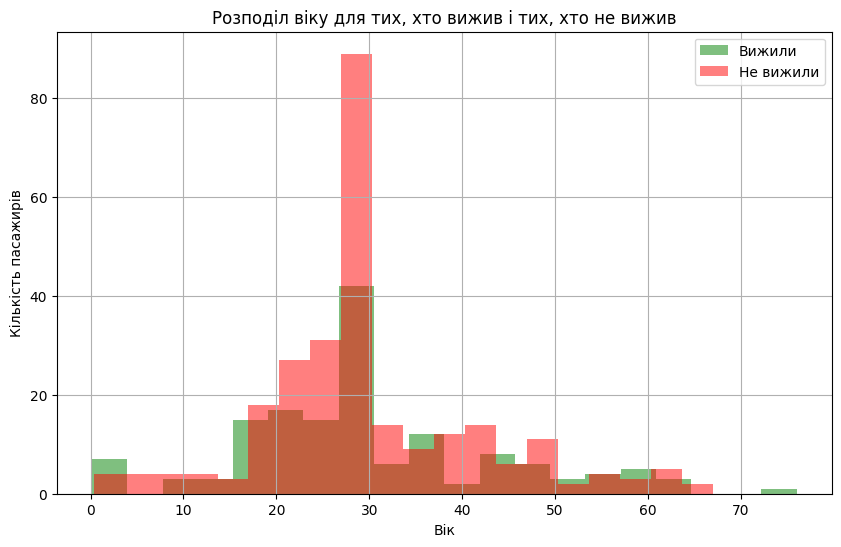

In [110]:
#20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

plt.figure(figsize=(10, 6))

# Гістограма для тих, хто вижив
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.5, label='Вижили', color='g')

# Гістограма для тих, хто не вижив
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.5, label='Не вижили', color='r')

plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.title('Розподіл віку для тих, хто вижив і тих, хто не вижив')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

In [30]:
#21.Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?



In [ ]:
#22.Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?